# 3. Introduction to Vital Signals
### 3.1. Overview and Classification of Bio-signals

#### 3.1.1. Bio-signal Definition and Nature
* **Definition:** A signal recorded (temporal, spatial, or spatio-temporal) from a biological process (electrical, chemical, or mechanical).
* **Signal Nature:** Bio-signals are generally considered **random (stochastic) or chaotic**, not deterministic, due to the complexity (e.g., the aggregate of many neurons in EEG).
* **Signal Processing Goal:** To extract information about the living organism for monitoring and diagnosis.

#### 3.1.2. Classification by Physical Origin
| Origin | English Name | Examples |
| :--- | :--- | :--- |
| **Electrical** | **Bioelectric** | **EEG, ECG, EMG, EOG** (Brain, Heart, Muscle, Eye) |
| **Mechanical** | **Biomechanical** | **ABP** (Arterial Blood Pressure), Heart/Lung Sounds |
| **Magnetic** | **Biomagnetic** | **MEG, MCG** |
| **Optical** | **Bio-optical** | **PPG**, Pulse Oximetry, fNIRS |
| **Impedance** | **Bioimpedance** | Tissue impedance changes (e.g., during respiration) |

#### 3.1.3. Classification by Organ
* **Organs:** Brain, Heart, Muscles, Stomach, Eyes, Respiratory System, Joints.

---
### 3.2. Cardiac Signals (Cardiovascular Signals)
This section focuses on the electrical, acoustic, and mechanical signals produced by the heart.

#### 3.2.1. Electrocardiogram (ECG/EKG)
* **Origin:** Electrical activity of the heart muscle (depolarization and repolarization).
* **Characteristics:** **Quasi-periodic** signal, $\sim \text{mV}$ amplitude, main bandwidth $\sim 0.5 \text{ Hz}$ to $100 \text{ Hz}$.
* **Waveforms and Intervals:**
    * **P wave:** Atrial depolarization.
    * **QRS Complex:** Ventricular depolarization (**most important component**).
    * **T wave:** Ventricular repolarization.
    * **R-R Series:** The time interval between successive R peaks.
    * **HRV (Heart Rate Variability):** Fluctuations in the R-R interval, used to assess autonomic nervous system activity.

#### 3.2.2. Phonocardiogram (PCG) - Heart Sounds
* **S1 (First Sound):** Corresponds to the end of QRS (closure of Mitral valve).
* **S2 (Second Sound):** Corresponds to the end of T wave (closure of Aortic valve).
* **Murmur:** Abnormal blood flow sound.

---
### 3.3. Brain Signals (Electroencephalography - EEG)
This section details the most common method for measuring brain electrical activity.

#### 3.3.1. Signal Origin and Recording
* **Origin:** Postsynaptic potentials generated primarily by pyramidal neurons.
* **Characteristics:** Non-invasive scalp recording, amplitude $\le 100 \mu\text{V}$, main bandwidth $0.5 \text{ Hz} - 60 \text{ Hz}$.
* **Electrode Placement:** Standard **10-20 System** (locations like Fz, Cz, Pz, etc.).
* **Recording Modes:** Monopolar (vs. reference), Bipolar (difference between two electrodes).

#### 3.3.2. Brain Rhythms (Frequency Bands)
| Band | Frequency Range | Associated State |
| :--- | :--- | :--- |
| **Delta ($\delta$)** | $0.5 - 4 \text{ Hz}$ | Deep sleep, unconsciousness. |
| **Theta ($\theta$)** | $4 - 8 \text{ Hz}$ | Light sleep, drowsiness. |
| **Alpha ($\alpha$)** | $8 - 13 \text{ Hz}$ | Relaxed wakefulness, eyes closed. |
| **Beta ($\beta$)** | $13 - 30 \text{ Hz}$ | Active focus, tension, thinking. |
| **Gamma ($\gamma$)** | $> 30 \text{ Hz}$ | High-level cognitive processing. |

#### 3.3.3. Event-Related Potentials (ERP) and Evoked Potentials (EP)
* **Definition:** Small, transient brain responses following a specific stimulus, requiring **Synchronous Averaging** for extraction.
* **EP (Exogenous):** Sensory responses (e.g., VEP, AEP).
* **ERP (Endogenous):** Cognitive responses (e.g., **P300**) related to decision-making (Oddball paradigms).
* **SSVEP (Steady State VEP):** Brain response at the same frequency as a continuous visual flicker (used in BCI).

#### 3.3.4. Noise and Artifacts
* **Physiological Artifacts (Major Noise Sources):**
    * **EOG Artifacts** (Eye movement/blinks) - strongest noise source.
    * **EMG Artifacts** (Muscle activity).
    * **ECG Artifacts** (Cardiac signal contamination).
* **Non-Physiological Artifacts:** Powerline noise, electrode/cable movement.

---

### 3.4. Other Key Bio-signals

| Signal | Organ/Source | Purpose |
| :--- | :--- | :--- |
| **EMG** (Electromyogram) | Muscles | Study muscle contraction and neuromuscular disorders. |
| **EGG** (Electrogastrogram) | Stomach | Study gastric motility and rhythm. |
| **EOG** (Electrooculogram) | Eyes | Monitor eye position and remove artifacts from EEG. |
| **VAG** (Vibroarthrography) | Joints | Detect vibrations from joint friction. |

## Python Examples: Vital Signal Processing
### Example 1: ECG Waveform Visualization and R-Peak Detection
This code simulates a typical ECG and uses a simple filtering technique to detect the R-peaks, a core task in cardiac signal processing.

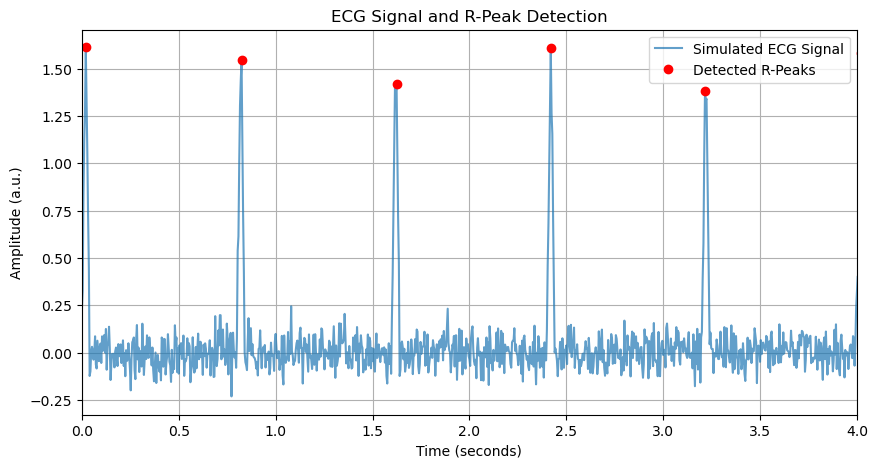

Calculated Mean Heart Rate: 75.03 BPM


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Sample ECG Signal
fs = 250 # Sampling frequency (Hz)
t = np.linspace(0, 10, 10 * fs, endpoint=False)
heart_rate = 75 # BPM
period = fs * 60 / heart_rate
num_beats = int(len(t) / period)

# Generate a synthetic signal for illustration
ecg = np.zeros_like(t)
for i in range(num_beats):
    start = int(i * period)
    # R-peak approximation (main spike)
    ecg[start:start+10] += 1.5 * np.exp(-0.5 * ((t[start:start+10] - t[start+5]) / 0.01)**2)
    # Noise/Baseline wander for realism
    ecg += 0.2 * np.random.randn(len(t)) / 10
ecg = ecg[:len(t)]

# Detection
r_peaks, _ = find_peaks(ecg, height=1.0, distance=period * 0.7)

# Visualiazation
plt.figure(figsize=(10, 5))
plt.plot(t, ecg, label='Simulated ECG Signal', alpha=0.7)
plt.plot(t[r_peaks], ecg[r_peaks], 'ro', label='Detected R-Peaks')
plt.title('ECG Signal and R-Peak Detection')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (a.u.)')
plt.xlim(0, 4) # Show only the first few seconds
plt.legend()
plt.grid(True)
plt.show()

# Calculate heart rate based on detected peaks (for illustration)
mean_rr_interval = np.mean(np.diff(r_peaks)) / fs
calculated_hr = 60 / mean_rr_interval
print(f"Calculated Mean Heart Rate: {calculated_hr:.2f} BPM")

# Example 2: EEG Frequency Analysis and Alpha Rhythm Isolation
This code simulates an EEG signal containing multiple brain rhythms and demonstrates how to use digital filters to isolate the Alpha Band ($\mathbf{8-13 \text{ Hz}}$).

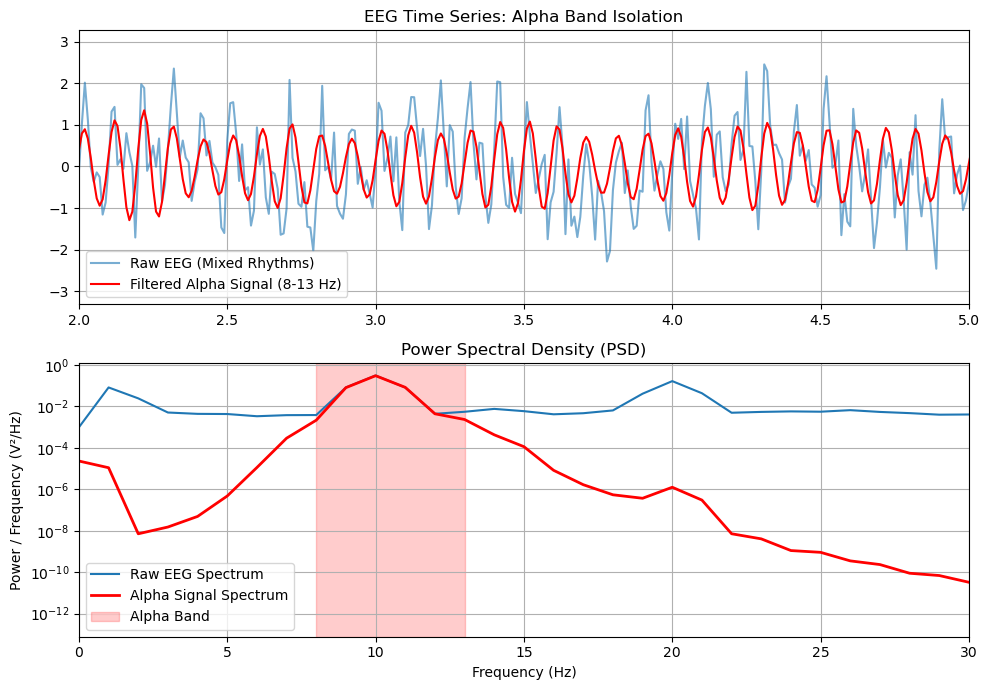

In [14]:
# EEG Alpha Band Isolation
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, welch

# 1. Simulate EEG
fs = 100 #sampling rate
t = np.linspace(0, 10, 10*fs, endpoint=False)

# Components: Delta (1Hz), Alpha (10Hz), Beta (20Hz)
delta = 0.5 * np.sin(2 * np.pi * 1 * t)
alpha = 1.0 * np.sin(2 * np.pi * 10 * t) # This is the target rhythm
beta = 0.7 * np.sin(2 * np.pi * 20 * t)
noise = 0.5 * np.random.randn(len(t))

eeg_signal = delta + alpha + beta + noise

# 2. Design Bandpass Filter for Alpha
lowcut = 8.0
highcut = 13.0
order = 5
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist

# Butterworth filter design (IIR - efficient)
b, a = butter(order, [low, high], btype='band')

# Apply the filter
alpha_signal = lfilter(b, a, eeg_signal)

# 3. frequency Spectrum Analysis 
f_raw, Pxx_raw = welch(eeg_signal, fs, nperseg=fs)
f_filtered, Pxx_filtered = welch(alpha_signal, fs, nperseg=fs)

# 4.Visualization
fig, axes = plt.subplots(2, 1, figsize=(10, 7))

# Plot 4a: Time Domain Comparison
axes[0].plot(t, eeg_signal, label='Raw EEG (Mixed Rhythms)', alpha=0.6)
axes[0].plot(t, alpha_signal, label='Filtered Alpha Signal (8-13 Hz)', color='red', linewidth=1.5)
axes[0].set_title('EEG Time Series: Alpha Band Isolation')
axes[0].set_xlim(2, 5)
axes[0].legend()
axes[0].grid(True)

# Plot 4b: Frequency Domain Comparison
axes[1].semilogy(f_raw, Pxx_raw, label='Raw EEG Spectrum')
axes[1].semilogy(f_filtered, Pxx_filtered, label='Alpha Signal Spectrum', color='red', linewidth=2)
axes[1].axvspan(lowcut, highcut, color='red', alpha=0.2, label='Alpha Band')
axes[1].set_title('Power Spectral Density (PSD)')
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Power / Frequency (V²/Hz)')
axes[1].set_xlim(0, 30)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Example 3: Simulating and Removing Powerline Artifact (Notch Filter)
This code demonstrates the critical step of using a Notch Filter to remove persistent $60 \text{ Hz}$ or $50 \text{ Hz}$ interference, a common artifact in many bio-signals.

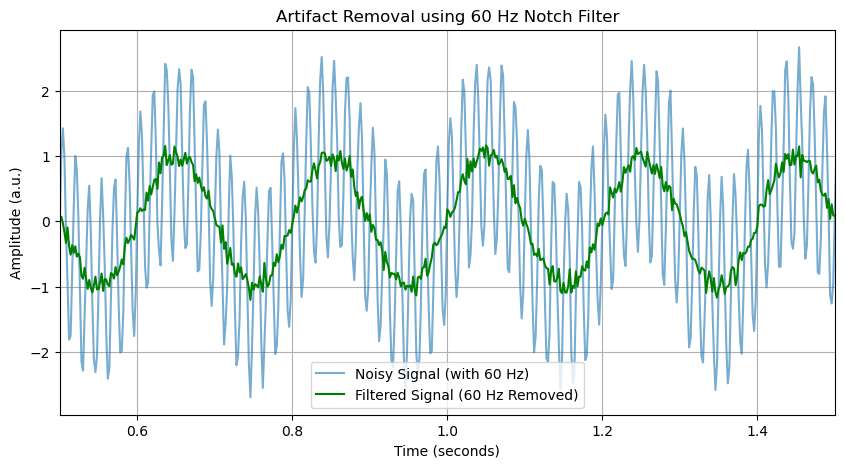

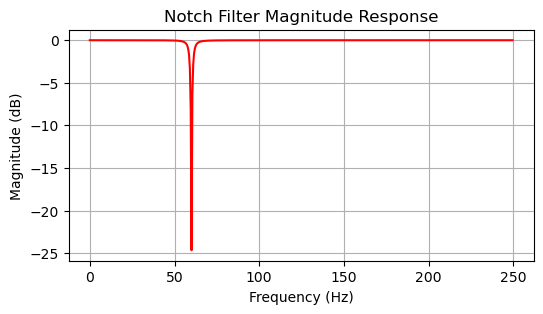

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, lfilter, freqz

# 1.Define Parameters and Design Notch Filter
fs = 500   # Sampling frequency (Hz)
f_noise = 60 # Powerline frequency (60 Hz)
Q = 30     # Quality factor (controls sharpness)

# Design the IIR Notch Filter
normalized_f0 = f_noise / (fs / 2)
b_notch, a_notch = iirnotch(normalized_f0, Q)

# 2. Create Noisy ECG/EEG
t = np.linspace(0, 2, 2 * fs, endpoint=False)
# Base Signal (e.g., EEG/ECG component)
clean_signal = 1.0 * np.sin(2 * np.pi * 5 * t)
# Powerline Noise
noise_60hz = 1.5 * np.sin(2 * np.pi * 60 * t) 
noisy_signal = clean_signal + noise_60hz + 0.1 * np.random.randn(len(t))

# 3.Apply the Notch Filter
filtered_signal = lfilter(b_notch, a_notch, noisy_signal)

# 4. Visualizaion
plt.figure(figsize=(10, 5))
plt.plot(t, noisy_signal, label='Noisy Signal (with 60 Hz)', alpha=0.6)
plt.plot(t, filtered_signal, label='Filtered Signal (60 Hz Removed)', color='green', linewidth=1.5)

plt.title(f'Artifact Removal using {f_noise} Hz Notch Filter')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (a.u.)')
plt.xlim(0.5, 1.5) # Zoom in to see the effect clearly
plt.legend()
plt.grid(True)
plt.show()

# Verification in Frequency Domain (Optional)
w, h = freqz(b_notch, a_notch, fs=fs)
plt.figure(figsize=(6, 3))
plt.plot(w, 20 * np.log10(abs(h)), 'r')
plt.title('Notch Filter Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()